In [1]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore') # 불필요한 경고 출력 방지

## 의사결정나무(Decision Tree)를 활용한 분류

[의사결정나무 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

### 유방암 진단 데이터 로드

In [2]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터 로드
cancer = load_breast_cancer()

### 학습/테스트 데이터 분할

In [3]:
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 분할(test_size: 30%)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, random_state=42)

### 모델링

In [4]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 모델 학습
dt_clf.fit(x_train, y_train)

print(f'Train 데이터 정확도: {dt_clf.score(x_train, y_train):.3f}')
print(f'Test 데이터 정확도: {dt_clf.score(x_test, y_test):.3f}')

# 학습 데이터에 과적합된 모델 -> max_depth 하이퍼 파라미터에 제한을 두지 않아 끝까지 분류를 진행

Train 데이터 정확도: 1.000
Test 데이터 정확도: 0.918


In [7]:
from sklearn.metrics import accuracy_score

# 예측 수행
preds = dt_clf.predict(x_test)

# 정확도 산출
accur = accuracy_score(preds, y_test)
print('예측 정확도:', round(accur, 3))

예측 정확도: 0.918


### 의사결정나무의 깊이(Depth) 제한


In [8]:
# max_depth를 3으로 제한
dt_clf = DecisionTreeClassifier(max_depth=3, random_state= 0)

# 모델 학습
dt_clf.fit(x_train, y_train)

print(f'Train 데이터 정확도: {dt_clf.score(x_train, y_train):.3f}')
print(f'Test 데이터 정확도: {dt_clf.score(x_test, y_test):.3f}')

Train 데이터 정확도: 0.970
Test 데이터 정확도: 0.965


In [10]:
# 예측 수행
preds = dt_clf.predict(x_test)

# 정확도 산출
accur = accuracy_score(y_test, preds)
print('예측 정확도:', round(accur, 3))

예측 정확도: 0.965


### Graphviz 라이브러리를 이용하여 Decision Tree 모델 시각화


In [ ]:
# graphviz 설치(anaconda prompt에서도 pip install graphviz로 설치 가능)
# !pip install graphviz

In [11]:
from sklearn.tree import export_graphviz

# out_file로 지정된 의사결정나무 시각화 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", # 그래프의 정보가 담긴 tree.dot 파일 생성
                class_names=['Negative', 'Positive'], # 'target_names': ['malignant', 'benign']
                feature_names = cancer.feature_names,
                impurity=False, # impurity=False: 지니계수 출력하지 않음
                filled=True) # filled=True: 의사결정나무 모형 색상 채우기

# export_graphviz()는 파일을 생성하는 함수 -> 그래프를 출력하기 위해서는 출력 함수에 파일을 담아 실행

In [ ]:
import graphviz

# tree.dot 파일 불러오기
with open("tree.dot") as f:
    dot_graph=f.read()

# tree.dot 파일의 그래프 출력
graphviz.Source(dot_graph)

# 첫 번째 분기: Negative samples 149, Positive samples 249 -> class = Positive
# mean concave points 0.051 이하이면 True, 아니면 False로 다음 분기 이동
# 분기점 찾고 Negative, Positive 나누는 작업 반복(max_depth: 3)

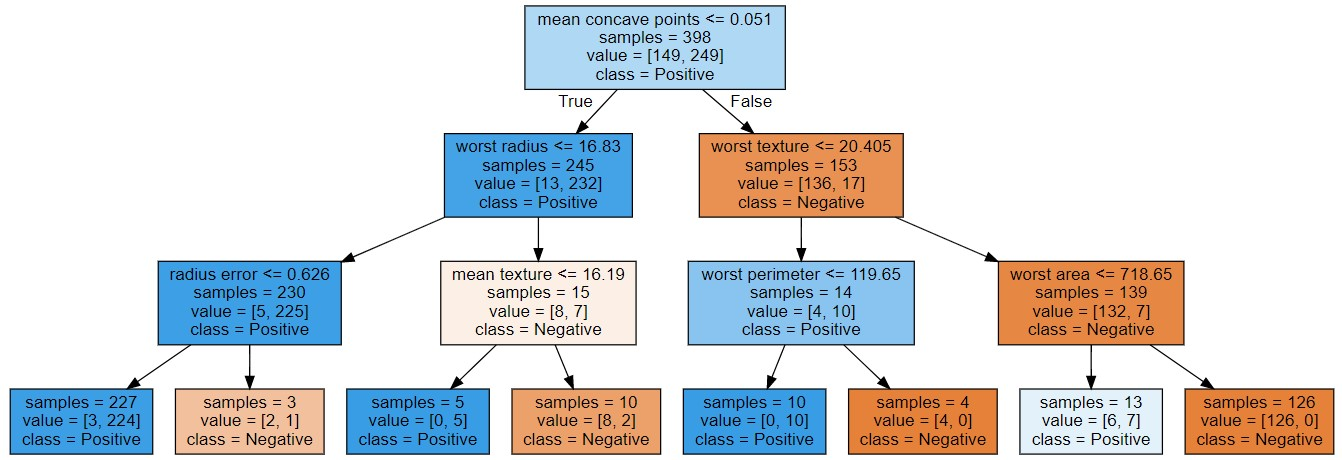

### Decision Tree의 특성 중요도


In [13]:
# feature 이름 출력
print(cancer.feature_names)
print()

# 특성 중요도 출력
print('특성 중요도')
print(dt_clf.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

특성 중요도
[0.         0.02516887 0.         0.         0.         0.
 0.         0.77627009 0.         0.         0.01491592 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04348197 0.0661448  0.0337083  0.04031006
 0.         0.         0.         0.         0.         0.        ]


In [14]:
# dt_clf의 특성 중요도를 데이터프레임에 저장

import pandas as pd

# cancer의 feature_names를 col_name에 저장
col_name = cancer.feature_names

# feature_importances_를 imp에 저장
imp = dt_clf.feature_importances_

# col_name과 imp를 dictionary 형태로 저장
dic_imp = {'FeatureName':col_name, 'Importance':imp}

# dic_imp를 데이터프레임에 저장
df_feature_imp = pd.DataFrame(dic_imp)

# 특성 중요도를 기준으로 df_feature_imp 내림차순 정렬
df_feature_imp =  df_feature_imp.sort_values(by='Importance', ascending=False)
df_feature_imp

,FeatureName,Importance
7,mean concave points,0.776270
21,worst texture,0.066145
20,worst radius,0.043482
23,worst area,0.040310
22,worst perimeter,0.033708
1,mean texture,0.025169
10,radius error,0.014916
0,mean radius,0.000000
17,concave points error,0.000000
28,worst symmetry,0.000000


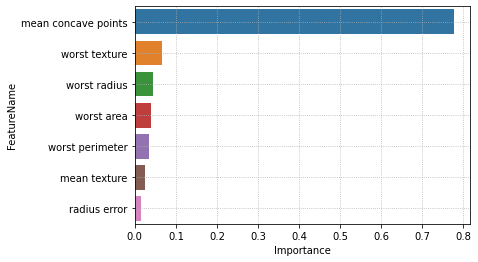

In [15]:
# 특성 중요도가 0보다 큰 변수들만 수평 막대그래프로 시각화

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importance가 0보다 큰 feature만 df 데이터프레임에 저장(pandas의 loc)
df = df_feature_imp.loc[df_feature_imp['Importance'] > 0]

# barplot 출력
sns.barplot(x='Importance', y='FeatureName', data=df)
plt.grid(linestyle=':')

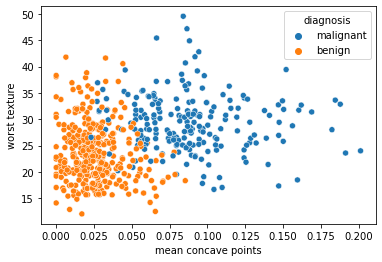

In [16]:
# 중요도가 가장 높은 변수 2개로 데이터 시각화('mean concave points', 'worst texture')

# cancer.data(feature)를 데이터프레임에 저장
df_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# target 데이터를 담은 'diagnosis' 컬럼 생성
df_data['diagnosis'] = cancer.target

# scatterplot 출력: mean concave points, worst texture -> diagnosis로 구분
s = sns.scatterplot(x='mean concave points', y='worst texture', hue='diagnosis', data=df_data)

s.legend_.texts[0].set_text('malignant')
s.legend_.texts[1].set_text('benign')

### GridSearchCV 하이퍼 파라미터 튜닝

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# DecisionTreeClassifier 객체 생성
dtree = DecisionTreeClassifier(random_state=0)

# 하이퍼 파라미터 dictionary 생성
parameters = {'max_depth':[2, 3, 4, 5, 6, 7, 8], 'min_samples_split':[2, 3, 4, 5]}

# GridSearchCV 수행(cv=3)
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3)

# 모델 학습
grid_dtree.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5]})

In [18]:
# 최적의 파라미터(best_params_)와 최고의 정확도(best_score_) 출력
print('Optimal parameter:', grid_dtree.best_params_)
print(f'Max accuracy: {grid_dtree.best_score_:.4f}') 

Optimal parameter: {'max_depth': 4, 'min_samples_split': 4}
Max accuracy: 0.9347


In [19]:
from sklearn.metrics import accuracy_score

# 최적의 파라미터로 예측 수행
grid_pred = grid_dtree.predict(x_test)

# 예측 정확도 출력
accur = accuracy_score(y_test, grid_pred)
print(f'Test datast accuracy: {accur:.4f}')

Test datast accuracy: 0.9474


### 성능 지표

In [20]:
from sklearn.metrics import confusion_matrix, f1_score

# 정오 행렬 출력
confusion_matrix(y_test, grid_pred)

array([[ 59,   4],
       [  5, 103]], dtype=int64)

In [24]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

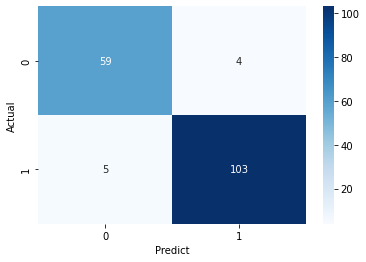

In [25]:
# 히트맵으로 정오 행렬 출력(malignant: 0, benign: 1)
sns.heatmap(confusion_matrix(y_test, grid_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [26]:
# 성능 지표 출력

from sklearn.metrics import precision_score, recall_score, f1_score

acccuracy = accuracy_score(y_test, grid_pred)
precision = precision_score(y_test, grid_pred)
recall = recall_score(y_test, grid_pred)
f1 = f1_score(y_test, grid_pred)

print(f'Accuracy(Test): {acccuracy:.4f}')
print(f'Precision(Test): {precision:.4f}')
print(f'Recall(Test): {recall:.4f}')
print(f'F1 Score(Test): {f1:.4f}')

Accuracy(Test): 0.9474
Precision(Test): 0.9626
Recall(Test): 0.9537
F1 Score(Test): 0.9581
